<a href="https://colab.research.google.com/github/r-vikrantsagar/NLP_Projects/blob/main/Pro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Poem Generator

In [ ]:
import os
import pandas as pd
import numpy as  np
import re
import spacy
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd


#this trick the server to think that we are connecting from a web browser
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"
opener = AppURLopener()
writer = "edgar-allan-poe-poems"
data = opener.open('https://mypoeticside.com/poets/' + writer).read().decode()

#search and save the poem links
soup =  BeautifulSoup(data, 'html.parser')
poem_list = soup.find(class_="list-poems")
links = poem_list.findAll('a')
results = ["https:"+link.get('href') for link in links]

#saves the title and content of each poem
titles = []
corpus = []
for page in results:
     data = opener.open(page).read().decode()
     soup = BeautifulSoup(data, 'html.parser')
     title = soup.find(class_='title-poem')
     poem = soup.find(class_='poem-entry')
     titles.append(title.getText())
     print(title.getText())
     corpus.append(poem.find('p').getText())

 #saves to a .csv file all the poems
poems = pd.DataFrame({'title' : titles,'text' : corpus})
poems.to_csv('allan_poems.csv')

<ipython-input-1-5bc3cce881f4>:14: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  opener = AppURLopener()


A Dream
A Dream Within A Dream
A pÆan
A Valentine
Al Aaraaf
Alone
An Acrostic
An Enigma
Annabel Lee
Bridal Ballad
DreamLand
Dreams
Eldorado
Elizabeth
Enigma
Epigram for Wall Street
Eulalie
Eureka - A Prose Poem
Evening Star
Fairy-Land
For Annie
Hymn
Hymn to Aristogeiton and Harmodius
Imitation
Impromptu. To Kate Carol
In the Greenest of our Valleys
In Youth I have Known One
Israfel
Lenore
Romance
Sancta Maria
Serenade
Song
Sonnet - To Science
Sonnet- Silence
Sonnet- To Zante
Spirits Of The Dead
Stanzas
Tamerlane
The Bells
The City In The Sea
The Coliseum
The Conqueror Worm
The Divine Right Of Kings
The Forest Reverie
The Happiest Day-The Happiest Hour
The Haunted Palace
The Lake. To--
The Raven
The Sleeper
The Valley Of Unrest
To --
To --
To --
To -- --
To F--
To F--S S. O--D
To Helen - 1848
To Helen-1831
To M--
To M.L.S.
To My Mother
To One Departed
To One In Paradise
To The River --
Ulalume


In [ ]:
def docs_to_sentences(file, split=r"\n"):
    path = os.getcwd()
    df_docs = pd.read_csv(path+"/" + file)
    number_docs = df_docs.shape[0]
    df_sentences = pd.DataFrame(columns=['doc_id','sentence'])
    for i in range(number_docs):
        text = df_docs.text[i]
        #dictionary to replace unwanted elements
        replace_dict = {'?«' :  '«', '(' :  '', ')' : '', ':' : ',', '.' : ',', ',,,' : ',', '"':''}
        for x,y in replace_dict.items():
            text = text.replace(x, y)
        text = text.lower()
        #split into sentences
        sentences = re.split(split, text)
        len_sentences = len(sentences)
        doc_id = [i] * (len_sentences)
        #save sentence and poem_id
        doc_sentences = pd.DataFrame({'doc_id' : doc_id, 'sentence' : sentences})
        df_sentences = df_sentences.append(doc_sentences)
    #extra cleaning and reset index
    df_sentences = df_sentences[df_sentences.sentence != '']
    df_sentences.reset_index(drop=True, inplace=True)
    #saves clean sentences to a .csv file
    df_sentences.to_csv("sentences_" + file)

docs_to_sentences('allan_poems.csv')

<ipython-input-2-8c3767995c80>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentences = df_sentences.append(doc_sentences)
<ipython-input-2-8c3767995c80>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentences = df_sentences.append(doc_sentences)
<ipython-input-2-8c3767995c80>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentences = df_sentences.append(doc_sentences)
<ipython-input-2-8c3767995c80>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentences = df_sentences.append(doc_sentences)
<ipython-input-2-8c3767995c80>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [ ]:
def poem_generator(file, word, n_sents=4):
        #load the english model from Spacy
        nlp = spacy.load("en_core_web_md")
        init_str = nlp(word)
        path = os.getcwd()
        sentences = pd.read_csv(path+'/'+ file)
        sup_index= sentences.shape[0]
        poem_id = int()
        poem =[]
        #generate the sentences
        for i in range(n_sents):
            rand_sent_index = np.random.randint(0, sup_index, size=30)
            sent_list = list(sentences.sentence.iloc[rand_sent_index])
            #transform sentences to a Spacy Doc object
            docs = nlp.pipe(sent_list)
            sim_list = []
            #compute similarity for each sentence
            for sent in docs:
                similarity = (init_str.similarity(sent))
                sim_list.append(similarity)
            #saves similarity to DataFrame
            df_1 = pd.DataFrame({'similarity' : sim_list, 'doc_id' : sentences.doc_id.iloc[rand_sent_index] }, index=rand_sent_index)
            df_1 = df_1[df_1.doc_id != poem_id]
            df_1.sort_values(by='similarity', inplace=True, ascending=False)
            sent_index= df_1.index[0]
            sent = sentences.sentence[sent_index]
            #erase line jumps and carriage return
            replace_dict = {'\n' :  '', '\r' :  ''}
            for x,y in replace_dict.items():
                sent = sent.replace(x, y)
            poem.append(sent)
            poem_id = df_1.doc_id.iloc[0]
            init_str = nlp(sent)
        #join the sentences with a line break
        str_poem = ("\n".join(poem))
        return str_poem

In [ ]:
def format_poem(text):
    text = text[:1].upper() + text[1:]
    text = text[:-1] + '.'
    return text

In [ ]:
#!python -m spacy download en_core_web_md
# Function to generate a poem
def poem_generator(file, word, n_sents=4):
    # Load the English model from Spacy
    nlp = spacy.load("en_core_web_md")
    init_str = nlp(word)
    path = os.getcwd()
    sentences = pd.read_csv(path + '/' + file)
    sup_index = sentences.shape[0]
    poem_id = int()
    poem = []

    # Clean and convert 'sentence' column to strings
    sentences['sentence'] = sentences['sentence'].astype(str)

    # Generate the sentences
    for i in range(n_sents):
        rand_sent_index = np.random.randint(0, sup_index, size=30)
        sent_list = list(sentences.sentence.iloc[rand_sent_index])

        # Transform sentences to a Spacy Doc object
        docs = nlp.pipe(sent_list)
        sim_list = []

        # Compute similarity for each sentence
        for sent in docs:
            similarity = init_str.similarity(sent)
            sim_list.append(similarity)

        # Saves similarity to DataFrame
        df_1 = pd.DataFrame({'similarity': sim_list, 'doc_id': sentences.doc_id.iloc[rand_sent_index]}, index=rand_sent_index)
        df_1 = df_1[df_1.doc_id != poem_id]
        df_1.sort_values(by='similarity', inplace=True, ascending=False)
        sent_index = df_1.index[0]
        sent = sentences.sentence[sent_index]

        # Erase line jumps and carriage return
        replace_dict = {'\n': '', '\r': ''}
        for x, y in replace_dict.items():
            sent = sent.replace(x, y)

        poem.append(sent)
        poem_id = df_1.doc_id.iloc[0]
        init_str = nlp(sent)

    # Join the sentences with a line break
    str_poem = ("\n".join(poem))
    return str_poem

# Take word input from the user
user_word = input("Enter the initial word for the poem: ")

# Generate a poem with the user input word
poem = poem_generator(file='sentences_allan_poems.csv', word=user_word)
poem = format_poem(poem)
print(poem)


Enter the initial word for the poem: whispers
    thy heart- thy heart!- i wake and sigh,
     adorn yon world afar, afar-
     'twas such as angel minds above
   that high tone of the spirit which hath striven.


### Text to Image

In [ ]:
!pip install diffusers transformers sentencepiece accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 23.0 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import PixArtAlphaPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-1024-MS", torch_dtype=torch.float16)
pipe = pipe.to('cuda')

model_index.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

tokenizer/added_tokens.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/9.06G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.45G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
torch.cuda.empty_cache()  # Release all unused cached memory
!nvidia-smi

Fri Dec  1 01:54:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    40W / 300W |  13410MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


    thy heart- thy heart!- i wake and sigh,
     adorn yon world afar, afar-
     'twas such as angel minds above
   that high tone of the spirit which hath striven.


  0%|          | 0/20 [00:00<?, ?it/s]

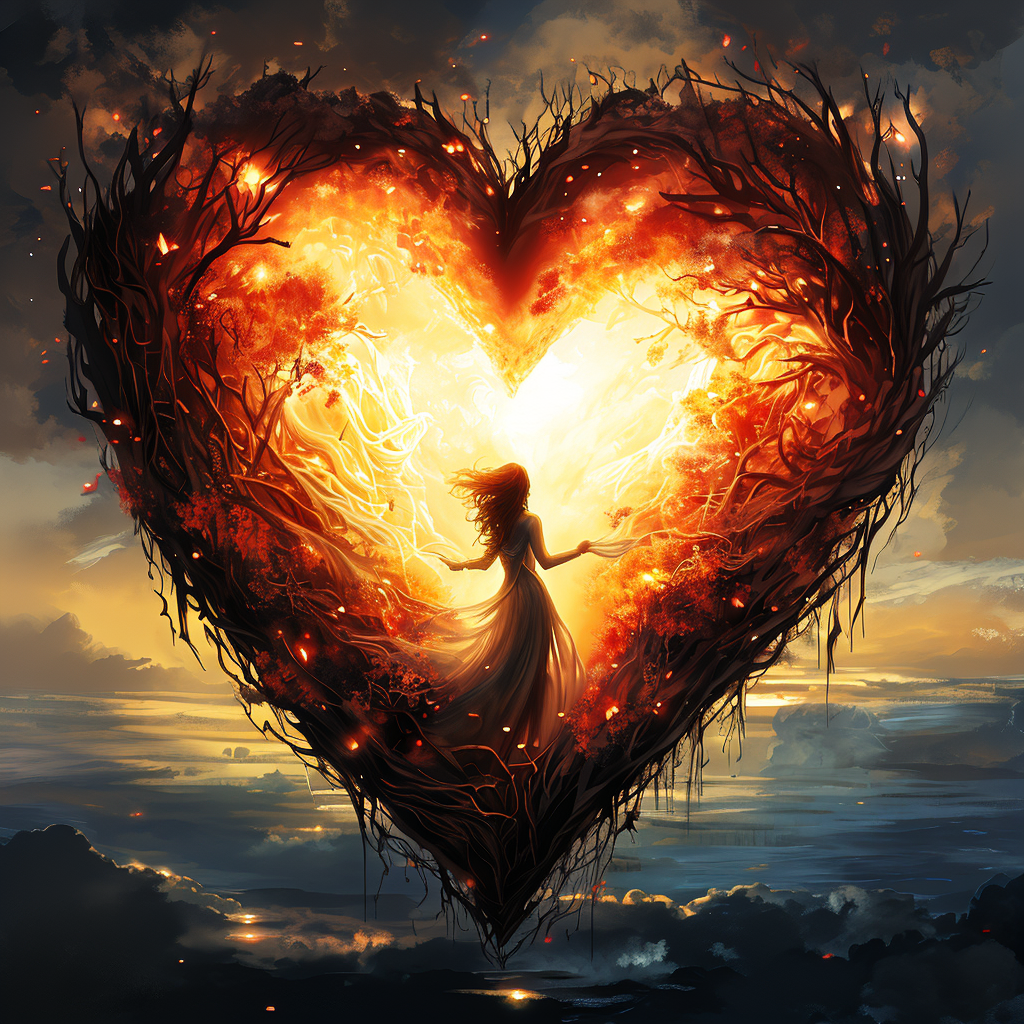

In [ ]:
print(poem)
prompt = poem
pipe(prompt).images[0]

### Text to Speech

In [ ]:
!pip install transformers
!pip install sentencepiece

In [ ]:
!pip install soundfile

In [ ]:
pip install --upgrade transformers sentencepiece datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser(poem, forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])


config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

Generating validation split: 0 examples [00:00, ? examples/s]